<a href="https://colab.research.google.com/github/Guilherme-Bernal/BigData-AC2_ML/blob/main/ac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col

# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.classification import RandomForestClassifier
# from pyspark.ml import Pipeline
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import numpy as np
import matplotlib.pyplot as plt
import os

from collections import OrderedDict

In [ ]:
#Path

anime_dataset_path = "/content/drive/MyDrive/Bigdata/data/anime-dataset-2023.csv"
anime_filtered_path = "/content/drive/MyDrive/Bigdata/data/anime-filtered.csv"
final_animedataset_path = "/content/drive/MyDrive/Bigdata/data/final_animedataset.csv"

user_filtered_path = "/content/drive/MyDrive/Bigdata/data/user-filtered.csv"
users_details_path = "/content/drive/MyDrive/Bigdata/data/users-details-2023.csv"
users_score_path = "/content/drive/MyDrive/Bigdata/data/users-score-2023.csv"

In [ ]:
#Files sizes bytes to gb

print(f"anime-dataset-2023 -  {os.path.getsize(anime_dataset_path)/1024**3:.3f} GB")
print(f"anime-filtered -      {os.path.getsize(anime_filtered_path)/1024**3:.3f} GB")
print(f"final_animedataset -  {os.path.getsize(final_animedataset_path)/1024**3:.3f} GB")

print(f"user-filtered -       {os.path.getsize(user_filtered_path)/1024**3:.3f} GB")
print(f"users-details-2023 -  {os.path.getsize(users_details_path)/1024**3:.3f} GB")
print(f"users-score-2023 -    {os.path.getsize(users_score_path)/1024**3:.3f} GB")

anime-dataset-2023 -  0.015 GB
anime-filtered -      0.009 GB
final_animedataset -  4.237 GB
user-filtered -       1.439 GB
users-details-2023 -  0.069 GB
users-score-2023 -    1.078 GB


In [ ]:
spark = SparkSession.builder.appName("Ac2 Big Data").getOrCreate()

### Read files with Spark and info collumns

In [ ]:
'''This dataset contains comprehensive details of 24,905 anime entries.'''
df_anime = spark.read.csv(anime_dataset_path, header=True, inferSchema=True)

# -=-=-=-=-=-= Collumns =-=-=-=-=-=-=-=
'''
anime_id
Unique ID for each anime.


Name
The name of the anime in its original language.


English name
The English name of the anime.


Other name
Other names or titles of the anime in different languages.


Score
The score or rating given to the anime.


Genres
The genres of the anime, separated by commas.


Synopsis
A brief description or summary of the anime's plot.


Type
The type of the anime (e.g., TV series, movie, OVA, etc.).


Episodes
The number of episodes in the anime.


Aired
The dates when the anime was aired.


Premiered
The season and year when the anime premiered.


Status
The status of the anime (e.g., Finished Airing, Currently Airing, etc.).


Producers
The production companies or producers of the anime.


Licensors
The licensors of the anime (e.g., streaming platforms).


Studios
The animation studios that worked on the anime.


Source
The source material of the anime (e.g., manga, light novel, original).


Duration
The duration of each episode.


Rating
The age rating of the anime.


Rank
The rank of the anime based on popularity or other criteria.


Popularity
The popularity rank of the anime.


Favorites
The number of times the anime was marked as a favorite by users.


Scored By
The number of users who scored the anime.


Members
The number of members who have added the anime to their list on the platform.


Image URL
The URL of the anime's image or poster.
'''

"\nanime_id\nUnique ID for each anime.\n\n\nName\nThe name of the anime in its original language.\n\n\nEnglish name\nThe English name of the anime.\n\n\nOther name\nOther names or titles of the anime in different languages.\n\n\nScore\nThe score or rating given to the anime.\n\n\nGenres\nThe genres of the anime, separated by commas.\n\n\nSynopsis\nA brief description or summary of the anime's plot.\n\n\nType\nThe type of the anime (e.g., TV series, movie, OVA, etc.).\n\n\nEpisodes\nThe number of episodes in the anime.\n\n\nAired\nThe dates when the anime was aired.\n\n\nPremiered\nThe season and year when the anime premiered.\n\n\nStatus\nThe status of the anime (e.g., Finished Airing, Currently Airing, etc.).\n\n\nProducers\nThe production companies or producers of the anime.\n\n\nLicensors\nThe licensors of the anime (e.g., streaming platforms).\n\n\nStudios\nThe animation studios that worked on the anime.\n\n\nSource\nThe source material of the anime (e.g., manga, light novel, origi

In [ ]:
'''This dataset provide information about the different attributes and characteristics of each anime(Based on 2020 data).'''
df_filtered = spark.read.csv(anime_filtered_path, header=True, inferSchema=True)

# -=-=-=-=-=-= Collumns =-=-=-=-=-=-=-=
'''
anime_id
The unique identifier for each anime.


Name
The name of the anime.


Score
The average rating score of the anime.


Genres
The genre(s) of the anime.


English name
The English name or alternate title of the anime.


Japanese name
The original Japanese name of the anime.


sypnopsis
A brief summary or description of the anime's storyline.


Type
The type of the anime, such as TV series, movie, or OVA.


Episodes
The total number of episodes for the anime.


Aired
The date range when the anime aired.


Premiered
The season and year when the anime premiered.


Producers
The production companies or studios involved in creating the anime.


Licensors
The companies that hold the license for distributing the anime.


Studios
The animation studios responsible for producing the anime.


Source
The source material for the anime, such as manga, light novel, or original.


Duration
The duration of each episode.


Rating
The target audience rating for the anime.


Ranked
The ranking position of the anime based on popularity or user ratings.


Popularity
The popularity rank of the anime.


Members
The number of members who have the anime in their list.


Favorites
The number of users who have marked the anime as their favorite.


Watching
The number of users currently watching the anime.


Completed
The number of users who have completed watching the anime.


On-Hold
The nuThe number of users who have put the anime on hold.mber of users who have dropped the anime.


Dropped
The number of users who have dropped the anime.
'''

"\nanime_id\nThe unique identifier for each anime.\n\n\nName\nThe name of the anime.\n\n\nScore\nThe average rating score of the anime.\n\n\nGenres\nThe genre(s) of the anime.\n\n\nEnglish name\nThe English name or alternate title of the anime.\n\n\nJapanese name\nThe original Japanese name of the anime.\n\n\nsypnopsis\nA brief summary or description of the anime's storyline.\n\n\nType\nThe type of the anime, such as TV series, movie, or OVA.\n\n\nEpisodes\nThe total number of episodes for the anime.\n\n\nAired\nThe date range when the anime aired.\n\n\nPremiered\nThe season and year when the anime premiered.\n\n\nProducers\nThe production companies or studios involved in creating the anime.\n\n\nLicensors\nThe companies that hold the license for distributing the anime.\n\n\nStudios\nThe animation studios responsible for producing the anime.\n\n\nSource\nThe source material for the anime, such as manga, light novel, or original.\n\n\nDuration\nThe duration of each episode.\n\n\nRating\

In [ ]:
'''This dataset contains user ratings and information about various anime titles. It is curated for building an anime recommendation
system(Based on 2018 data). The dataset includes the following columns:'''
df_final = spark.read.csv(final_animedataset_path, header=True, inferSchema=True)

# -=-=-=-=-=-= Collumns =-=-=-=-=-=-=-=
'''
username
The username of the user who rated the anime.


anime_id
The unique ID of the anime.


my_score
The rating score given by the user to the anime.


user_id
The ID of the user.


gender
The gender of the user.


title
The title of the anime.


type
The type of the anime (e.g., TV series, movie, OVA, etc.).


source
The source material of the anime (e.g., manga, light novel, original, etc.).


score
The overall score of the anime.


scored_by
The number of users who have rated the anime.


rank
The ranking of the anime.


popularity
The popularity rank of the anime.


genre
The genre(s) of the anime.
'''

'\nusername\nThe username of the user who rated the anime.\n\n\nanime_id\nThe unique ID of the anime.\n\n\nmy_score\nThe rating score given by the user to the anime.\n\n\nuser_id\nThe ID of the user.\n\n\ngender\nThe gender of the user.\n\n\ntitle\nThe title of the anime.\n\n\ntype\nThe type of the anime (e.g., TV series, movie, OVA, etc.).\n\n\nsource\nThe source material of the anime (e.g., manga, light novel, original, etc.).\n\n\nscore\nThe overall score of the anime.\n\n\nscored_by\nThe number of users who have rated the anime.\n\n\nrank\nThe ranking of the anime.\n\n\npopularity\nThe popularity rank of the anime.\n\n\ngenre\nThe genre(s) of the anime.\n'

In [ ]:
'''This dataset contains the user's ratings for every anime they watched and rated(Based on 2020 data).'''
df_user_filtered = spark.read.csv(user_filtered_path, header=True, inferSchema=True)

# -=-=-=-=-=-= Collumns =-=-=-=-=-=-=-=
'''
user_id
User ID of the users.


anime_id
Anime ID of the animes user's watched.


rating
The Score user gave to the anime.
'''

"\nuser_id\nUser ID of the users.\n\n\nanime_id\nAnime ID of the animes user's watched.\n\n\nrating\nThe Score user gave to the anime.\n"

In [ ]:
'''This dataset comprises information on 731,290 users registered on the MyAnimeList platform. It is worth noting that while a significant
portion of these users are genuine anime enthusiasts, there may be instances of bots, inactive accounts, and alternate profiles present
within the dataset.'''
df_user_details = spark.read.csv(users_details_path, header=True, inferSchema=True)

# -=-=-=-=-=-= Collumns =-=-=-=-=-=-=-=
'''
Mal ID
Unique ID for each user.


Username
The username of the user.


Gender
The gender of the user.


Birthday
The birthday of the user (in ISO format).


Location
The location or country of the user.


Joined
The date when the user joined the platform (in ISO format).


Days Watched
The total number of days the user has spent watching anime.


Mean Score
The average score given by the user to the anime they have watched.


Watching
The number of anime currently being watched by the user.


Completed
The number of anime completed by the user.


On Hold
The number of anime on hold by the user.


Dropped
The number of anime dropped by the user.


Plan to Watch
The number of anime the user plans to watch in the future.


Total Entries
The total number of anime entries in the user's list.


Rewatched
The number of anime rewatched by the user.


Episodes Watched
The total number of episodes watched by the user.
'''

"\nMal ID\nUnique ID for each user.\n\n\nUsername\nThe username of the user.\n\n\nGender\nThe gender of the user.\n\n\nBirthday\nThe birthday of the user (in ISO format).\n\n\nLocation\nThe location or country of the user.\n\n\nJoined\nThe date when the user joined the platform (in ISO format).\n\n\nDays Watched\nThe total number of days the user has spent watching anime.\n\n\nMean Score\nThe average score given by the user to the anime they have watched.\n\n\nWatching\nThe number of anime currently being watched by the user.\n\n\nCompleted\nThe number of anime completed by the user.\n\n\nOn Hold\nThe number of anime on hold by the user.\n\n\nDropped\nThe number of anime dropped by the user.\n\n\nPlan to Watch\nThe number of anime the user plans to watch in the future.\n\n\nTotal Entries\nThe total number of anime entries in the user's list.\n\n\nRewatched\nThe number of anime rewatched by the user.\n\n\nEpisodes Watched\nThe total number of episodes watched by the user.\n"

In [ ]:
'''This dataset comprises anime scores provided by 270,033 users, resulting in a total of 24,325,191 rows or samples.'''
df_user_score = spark.read.csv(users_score_path, header=True, inferSchema=True)

# -=-=-=-=-=-= Collumns =-=-=-=-=-=-=-=
'''
user_id
Unique ID for each user.


Username
The username of the user.


anime_id
Unique ID for each anime.


Anime Title
The title of the anime.


rating
The rating given by the user to the anime.
'''


'\nuser_id\nUnique ID for each user.\n\n\nUsername\nThe username of the user.\n\n\nanime_id\nUnique ID for each anime.\n\n\nAnime Title\nThe title of the anime.\n\n\nrating\nThe rating given by the user to the anime.\n'

In [ ]:
df_anime.show()
df_filtered.show()
df_final.show()
df_user_filtered.show()
df_user_details.show()
df_user_score.show()

+--------------------+--------------------+--------------------+------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+---------+--------------------+--------------------+--------------------+
|            anime_id|                Name|        English name|                    Other name|               Score|              Genres|            Synopsis|                Type|            Episodes|               Aired|           Premiered|              Status|           Producers|           Licensors|             Studios|              Source|            Duration|              Rating|       Rank|          Popularity|Favorites|           Scored By|             Members|           Image URL|
+-------

In [ ]:
def spark_shape(df):
  return (df.count(), len(df.columns))

In [ ]:
for name_df , df in zip(["df_anime", "df_filtered", "df_final", "df_user_filtered", "df_user_details", "df_user_score"],[df_anime, df_filtered, df_final, df_user_filtered, df_user_details, df_user_score]):
  shape = spark_shape(df)
  print(f"Shape of {name_df}: {shape}")

Shape of df_anime: (40779, 24)
Shape of df_filtered: (14952, 25)
Shape of df_final: (35305695, 13)
Shape of df_user_filtered: (109224747, 3)
Shape of df_user_details: (731290, 16)
Shape of df_user_score: (24325191, 5)


In [ ]:
#Count Nulls

def count_nulls(name_df, df):
  null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
  print(f"\n{name_df} Total of null values by collumn")
  null_counts.show()

for name_df , df in zip(["df_anime", "df_filtered", "df_final", "df_user_filtered", "df_user_details", "df_user_score"],[df_anime, df_filtered, df_final, df_user_filtered, df_user_details, df_user_score]):
  nulls = count_nulls(name_df, df)



df_anime Total of null values by collumn
+--------+----+------------+----------+-----+------+--------+-----+--------+-----+---------+------+---------+---------+-------+------+--------+------+-----+----------+---------+---------+-------+---------+
|anime_id|Name|English name|Other name|Score|Genres|Synopsis| Type|Episodes|Aired|Premiered|Status|Producers|Licensors|Studios|Source|Duration|Rating| Rank|Popularity|Favorites|Scored By|Members|Image URL|
+--------+----+------------+----------+-----+------+--------+-----+--------+-----+---------+------+---------+---------+-------+------+--------+------+-----+----------+---------+---------+-------+---------+
|       0|1297|        2040|      2725| 3400|  3962|    4396|13804|   14475|14927|    15234| 15452|    15579|    15699|  15761| 15796|   15830| 15844|22805|     23665|    24376|    25001|  25534|    25947|
+--------+----+------------+----------+-----+------+--------+-----+--------+-----+---------+------+---------+---------+-------+------+

In [ ]:
#Features Types

def get_dtype(df):
  return df.dtypes

tp = get_dtype(df_anime)
print(tp)

[('anime_id', 'string'), ('Name', 'string'), ('English name', 'string'), ('Other name', 'string'), ('Score', 'string'), ('Genres', 'string'), ('Synopsis', 'string'), ('Type', 'string'), ('Episodes', 'string'), ('Aired', 'string'), ('Premiered', 'string'), ('Status', 'string'), ('Producers', 'string'), ('Licensors', 'string'), ('Studios', 'string'), ('Source', 'string'), ('Duration', 'string'), ('Rating', 'string'), ('Rank', 'string'), ('Popularity', 'string'), ('Favorites', 'string'), ('Scored By', 'string'), ('Members', 'string'), ('Image URL', 'string')]


### Com base nas informações obtidas, iremos trabalhar com o arquivo 'final_animedataset.csv', que contempla os valores de ranqueamento dos animes fornecidos pelos usuarios. Outro ponto referente a escolha desse dataset é por conter mais de 4GB de dados.

In [ ]:
df = df_final
df.show()

+--------+--------+--------+-------+------+--------------------+----+------------+-----+---------+------+----------+--------------------+
|username|anime_id|my_score|user_id|gender|               title|type|      source|score|scored_by|  rank|popularity|               genre|
+--------+--------+--------+-------+------+--------------------+----+------------+-----+---------+------+----------+--------------------+
|karthiga|      21|       9|2255153|Female|           One Piece|  TV|       Manga| 8.54| 423868.0|  91.0|      35.0|Action, Adventure...|
|karthiga|      59|       7|2255153|Female|             Chobits|  TV|       Manga| 7.53| 175388.0|1546.0|     188.0|Sci-Fi, Comedy, D...|
|karthiga|      74|       7|2255153|Female|        Gakuen Alice|  TV|       Manga| 7.77|  33244.0| 941.0|    1291.0|Comedy, School, S...|
|karthiga|     120|       7|2255153|Female|       Fruits Basket|  TV|       Manga| 7.77| 167968.0| 939.0|     222.0|Slice of Life, Co...|
|karthiga|     178|       7|225515

In [ ]:
collumns_types = get_dtype(df)
print(collumns_types)

[('username', 'string'), ('anime_id', 'int'), ('my_score', 'int'), ('user_id', 'int'), ('gender', 'string'), ('title', 'string'), ('type', 'string'), ('source', 'string'), ('score', 'string'), ('scored_by', 'double'), ('rank', 'double'), ('popularity', 'double'), ('genre', 'string')]


In [ ]:
# df = df.drop('username','user_id')
# df.show()

In [ ]:
df.groupBy('type').count().show()

+--------------------+--------+
|                type|   count|
+--------------------+--------+
|                  TV|23696077|
|           Igi Ari!"|    7790|
| Doushite Konna O...|     370|
|             Special| 2576837|
|                 OVA| 3952868|
|               Music|  176054|
|               Movie| 4270626|
|                 ONA|  625073|
+--------------------+--------+



In [ ]:
unique_gender_distribution = df.dropDuplicates(['user_id']).groupBy('gender').count()
unique_gender_distribution.show()

+----------+-----+
|    gender|count|
+----------+-----+
|    Female|39993|
|Non-Binary|  598|
|      Male|75534|
+----------+-----+



OrderedDict([('Male', 75534), ('Female', 39993), ('Non-Binary', 598)])


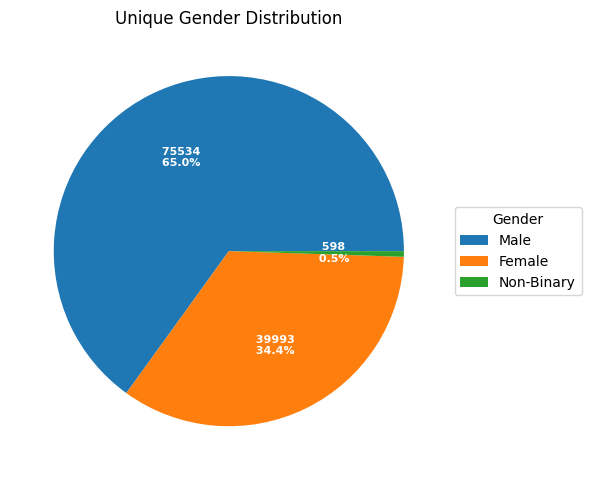

In [ ]:
# Plot distribution of gender

unique_gender = {row['gender']: row['count'] for row in unique_gender_distribution.collect()}
unique_gender = OrderedDict(sorted(unique_gender.items(), key=lambda x: x[1], reverse=True))

print(unique_gender)

unique_labels = unique_gender.keys()
unique_values = unique_gender.values()


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(unique_values, labels=unique_labels, autopct=lambda pct: f' {int(round(pct/100.*sum(unique_values)))} \n {pct:.1f}% ', textprops=dict(color="w"))

ax.legend(wedges, unique_labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Unique Gender Distribution')

plt.tight_layout()
plt.show()

In [ ]:
all_gender_distribution = df.groupBy('gender').count()
all_gender_distribution.show()

+----------+--------+
|    gender|   count|
+----------+--------+
|    Female| 9678908|
|Non-Binary|  240434|
|      Male|25386353|
+----------+--------+



OrderedDict([('Male', 25386353), ('Female', 9678908), ('Non-Binary', 240434)])


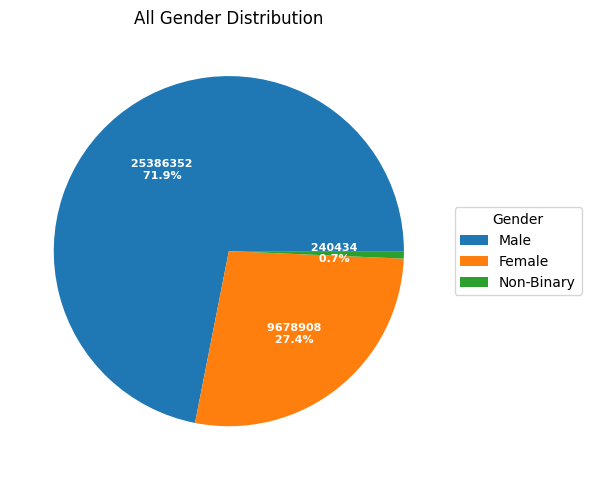

In [ ]:
all_gender = {row['gender']: row['count'] for row in all_gender_distribution.collect()}
all_gender = OrderedDict(sorted(all_gender.items(), key=lambda x: x[1], reverse=True))

print(all_gender)

all_labels = all_gender.keys()
all_values = all_gender.values()


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(all_values, labels=all_labels, autopct=lambda pct: f' {int(round(pct/100.*sum(all_values)))} \n {pct:.1f}% ', textprops=dict(color="w"))

ax.legend(wedges, all_labels, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title('All Gender Distribution')

plt.tight_layout()
plt.show()